<a href="https://colab.research.google.com/github/sfrias/fake4news/blob/master/scrapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<br><center style= "font-family:Script;font-size:3.2em;color:purple;font-style:bold">Fake4News Scrapping for Eurecat 2019 Internet Datathon </center> <br> <br>

## Group name:**Look4Fake**
**Participants: Alberto Pardo, Jose Romero, JM Torrents, JP Delzo, Santiago Frias.**

Research question: How fake news affects the social behavior of the population. Dataset by reddit

Testing and deployment for other news dataset cases(twitter,...) on Github for colaborative link: 

https://github.com/sfrias/fake4news

Member especially focused on this notebook: **JP Delzo**.

Messages over fake news,deep fake, social inquality, social media, information ethics, etc.. are related to a huge amount of words that are scattered on social media as for example:

>*false, feigned, fictitious, gossip, tattle, coloquial, junk, bogues, phony, concocted, invented, make, sham, soft, counterfeit,fabricated, forget, fraudulent, mock, simulated,artificial, blamey, authentic, genuine, real, sincere, true, original,truthful.*

Our objective is to find out if there is a high incidence of these words in the dataset granted. 

## Anexo: 
A litle sub program that round seconds:

In [0]:
import datetime as dt

In [0]:
def round_seconds(timedelta):
    seconds= int(timedelta.total_seconds())
    rounded_timedelta= dt.timedelta(seconds=seconds)  
    return(rounded_timedelta)    

# 1.Downloading dataset 
Extracting only the attribute **body** of every file 

In [20]:
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/gdrive')
import io

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [2]:
!ls -lah /gdrive/'My Drive'/materials_students/reddit_dataset.zip

-r-------- 1 root root 2.3G Nov  9 10:39 '/gdrive/My Drive/materials_students/reddit_dataset.zip'


In [3]:
!unzip  '/gdrive/My Drive/materials_students/reddit_dataset.zip'

Archive:  /gdrive/My Drive/materials_students/reddit_dataset.zip
   creating: reddit_dataset/
  inflating: reddit_dataset/RC_2018-06.csv  
  inflating: reddit_dataset/RC_2018-07.csv  
  inflating: reddit_dataset/RC_2018-05.csv  
  inflating: reddit_dataset/RC_2018-04.csv  
  inflating: reddit_dataset/RC_2018-01.csv  
  inflating: reddit_dataset/RC_2018-03.csv  
  inflating: reddit_dataset/RC_2018-02.csv  
  inflating: reddit_dataset/RC_2017-08.csv  
  inflating: reddit_dataset/RC_2017-09.csv  
  inflating: reddit_dataset/RC_2017-01.csv  
  inflating: reddit_dataset/RC_2017-02.csv  
  inflating: reddit_dataset/RC_2017-03.csv  
  inflating: reddit_dataset/RC_2017-07.csv  
  inflating: reddit_dataset/RC_2017-06.csv  
  inflating: reddit_dataset/RC_2017-12.csv  
  inflating: reddit_dataset/RC_2017-04.csv  
  inflating: reddit_dataset/RC_2017-10.csv  
  inflating: reddit_dataset/RC_2017-11.csv  
  inflating: reddit_dataset/RC_2017-05.csv  
  inflating: reddit_dataset/RC_2018-08.csv  


In [4]:
!ls -lah reddit_dataset

total 9.1G
drwxr-xr-x 2 root root 4.0K Nov  9 10:29 .
drwxr-xr-x 1 root root 4.0K Mar 14 22:58 ..
-rwxr-xr-x 1 root root 438M Nov  8 17:08 RC_2017-01.csv
-rwxr-xr-x 1 root root 420M Nov  8 17:09 RC_2017-02.csv
-rwxr-xr-x 1 root root 7.4M Nov  8 17:10 RC_2017-03.csv
-rwxr-xr-x 1 root root 351M Nov  8 17:10 RC_2017-04.csv
-rwxr-xr-x 1 root root 381M Nov  8 14:39 RC_2017-05.csv
-rwxr-xr-x 1 root root 381M Nov  8 17:12 RC_2017-06.csv
-rwxr-xr-x 1 root root 405M Nov  8 17:13 RC_2017-07.csv
-rwxr-xr-x 1 root root 462M Nov  8 17:13 RC_2017-08.csv
-rwxr-xr-x 1 root root 455M Nov  8 17:14 RC_2017-09.csv
-rwxr-xr-x 1 root root 499M Nov  8 17:15 RC_2017-10.csv
-rwxr-xr-x 1 root root 624M Nov  8 17:17 RC_2017-11.csv
-rwxr-xr-x 1 root root 677M Nov  8 17:34 RC_2017-12.csv
-rwxr-xr-x 1 root root 623M Nov  8 17:58 RC_2018-01.csv
-rwxr-xr-x 1 root root 525M Nov  8 17:58 RC_2018-02.csv
-rwxr-xr-x 1 root root 550M Nov  8 17:59 RC_2018-03.csv
-rwxr-xr-x 1 root root 491M Nov  8 18:03 RC_2018-04.csv
-rwxr-

In [0]:
years=[2017,2018]
messages=[[],[]]

In [0]:
months2017=[]
for month in range(1,13):
    if month < 10:
        months2017.append('0' + str(month))
    else:
        months2017.append(str(month))
months2018=['0'+str(month) for month in range(1,9)]
months=[months2017,months2018]

We would like to know the downloading time: 

In [12]:
print('DOWNLOADING TIME:')
initial_time = dt.datetime.now()
for indexy in range(len(years)):
    for month in months[indexy]:
        start_time= dt.datetime.now()
        adress="RC_{0}-".format(years[indexy]) + month + '.csv'
        file= io.open(file= 'reddit_dataset/' + adress,encoding= 'utf-8')
        lines= file.readlines()
        file.close()
        paragraph=[]
        for index in range(1,len(lines)):
            if '"' in lines[index].split(',')[1]:
                extract= lines[index].split('"')[1]
            else:
                extract= lines[index].split(',')[1]
            if '[removed]' != extract and '[deleted]' != extract:
                paragraph.append(extract)
        messages[indexy].append(paragraph) 
        end_time= dt.datetime.now()
        print(adress +':',round_seconds(end_time - start_time)) 
final_time= dt.datetime.now()
time= final_time-initial_time
print('\nTotal time:',round_seconds(time))
print('Avg time for file:',round_seconds(time/20))

DOWNLOADING TIME:
RC_2017-01.csv: 0:00:06
RC_2017-02.csv: 0:00:06
RC_2017-03.csv: 0:00:00
RC_2017-04.csv: 0:00:03
RC_2017-05.csv: 0:00:04
RC_2017-06.csv: 0:00:05
RC_2017-07.csv: 0:00:05
RC_2017-08.csv: 0:00:06
RC_2017-09.csv: 0:00:06
RC_2017-10.csv: 0:00:07
RC_2017-11.csv: 0:00:09
RC_2017-12.csv: 0:00:10
RC_2018-01.csv: 0:00:09
RC_2018-02.csv: 0:00:07
RC_2018-03.csv: 0:00:08
RC_2018-04.csv: 0:00:07
RC_2018-05.csv: 0:00:07
RC_2018-06.csv: 0:00:06
RC_2018-07.csv: 0:00:07
RC_2018-08.csv: 0:00:08

Total time: 0:02:15
Avg time for file: 0:00:06


Looking out if there are `[delete]` or `[removed]` texts by file:

In [13]:
for indexy in range(len(years)):
    for month in months[indexy]:
        file_name="RC_{0}-".format(years[indexy]) + month + '.csv:'
        deleted = '[deleted]' in messages[indexy][int(month)-1]
        removed = '[removed]' in messages[indexy][int(month)-1]
        print(file_name, deleted or removed)          

RC_2017-01.csv: False
RC_2017-02.csv: False
RC_2017-03.csv: False
RC_2017-04.csv: False
RC_2017-05.csv: False
RC_2017-06.csv: False
RC_2017-07.csv: False
RC_2017-08.csv: False
RC_2017-09.csv: False
RC_2017-10.csv: False
RC_2017-11.csv: False
RC_2017-12.csv: False
RC_2018-01.csv: False
RC_2018-02.csv: False
RC_2018-03.csv: False
RC_2018-04.csv: False
RC_2018-05.csv: False
RC_2018-06.csv: False
RC_2018-07.csv: False
RC_2018-08.csv: False


Last changing the leters that are in upper case to lower case:

In [14]:
print('TIMING:')
start= dt.datetime.now()
for indexy in range(len(years)):
    for month in months[indexy]:
        initial_time = dt.datetime.now()
        for ind in range(len(messages[indexy][int(month)-1])):
            messages[indexy][int(month)-1][ind]= messages[indexy][int(month)-1][ind].lower()
        end_time= dt.datetime.now()
        print('{0}-{1}:'.format(years[indexy],month),round_seconds(end_time-initial_time))
end= dt.datetime.now()
time= end- start
print('Total time:',round_seconds(time))
print('Avg time for file:',round_seconds(time/20))

TIMING:
2017-01: 0:00:01
2017-02: 0:00:01
2017-03: 0:00:00
2017-04: 0:00:01
2017-05: 0:00:01
2017-06: 0:00:01
2017-07: 0:00:01
2017-08: 0:00:01
2017-09: 0:00:01
2017-10: 0:00:01
2017-11: 0:00:01
2017-12: 0:00:02
2018-01: 0:00:02
2018-02: 0:00:01
2018-03: 0:00:01
2018-04: 0:00:01
2018-05: 0:00:01
2018-06: 0:00:01
2018-07: 0:00:01
2018-08: 0:00:01
Total time: 0:00:30
Avg time for file: 0:00:01


# 2. Rating words 

In [0]:
words=['false', 'feigned', 'fictitious', 'gossip', 'tattle', 'coloquial', 'junk', 'bogues', 'phony', 'concocted', 'invented', 
       'make', 'sham', 'soft', 'counterfeit','fabricated','forget', 'fraudulent', 'mock', 'simulated','artificial', 'blamey', 
       'authentic', 'genuine', 'real', 'sincere', 'true', 'original','truthful']

In [16]:
rates=[]
print('TIMING:')
start= dt.datetime.now()
for indexy in range(len(years)):
    for month in months[indexy]:
        initial_time = dt.datetime.now()
        counting=0
        monthly_texts= messages[indexy][int(month)-1]
        for ind in range(len(monthly_texts)):
            n=0
            for word in words:
                if word in monthly_texts[ind]:
                    break
                else:
                    n +=1
            if n != len(words):
                counting += 1
        rates.append(counting/len(monthly_texts))        
        end_time= dt.datetime.now()
        print('{0}-{1}:'.format(years[indexy],month),round_seconds(end_time-initial_time))
end= dt.datetime.now()
time= end- start
print('Total time:',round_seconds(time))
print('Avg time for file:',round_seconds(time/20))

TIMING:
2017-01: 0:00:10
2017-02: 0:00:10
2017-03: 0:00:00
2017-04: 0:00:08
2017-05: 0:00:09
2017-06: 0:00:09
2017-07: 0:00:10
2017-08: 0:00:11
2017-09: 0:00:11
2017-10: 0:00:12
2017-11: 0:00:15
2017-12: 0:00:17
2018-01: 0:00:15
2018-02: 0:00:13
2018-03: 0:00:13
2018-04: 0:00:12
2018-05: 0:00:13
2018-06: 0:00:11
2018-07: 0:00:12
2018-08: 0:00:13
Total time: 0:03:52
Avg time for file: 0:00:11


# 3. Ploting the outputs
Setting the month labels from Jan 17 to Aug 18: 

In [0]:
month_date=[]
for indexy in range(len(years)):
    for month in months[indexy]:
        date= dt.datetime(years[indexy],int(month),1)
        label= date.strftime('%y %b')
        month_date.append(label)

Plotting:

In [0]:
import matplotlib.pyplot as plt

In [21]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(14,7))

<Figure size 1008x504 with 0 Axes>

<Figure size 1008x504 with 0 Axes>

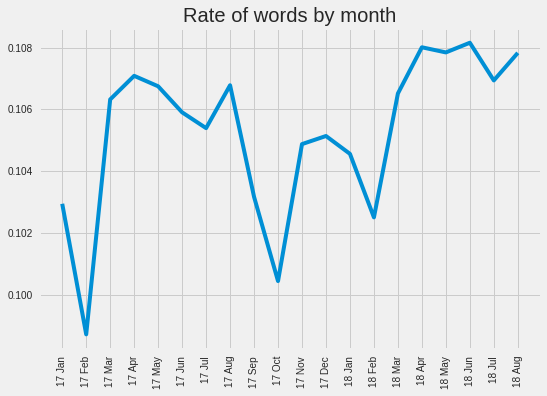

In [30]:
fig, ax = plt.subplots()
ax.set_xticks(range(len(month_date)))
ax.set_xticklabels(month_date, rotation = 'vertical')
plt.plot(rates)
plt.title('Rate of words by month')
plt.show()

There is practically an average of 10% in expressions the involves the selected words with the total of sent messages.